In [39]:
from keras.datasets import imdb
import numpy as np
(train_data, train_labels), (test_data, test_label) = imdb.load_data(num_words=10000)

In [40]:
max([max(x) for x in train_data])

9999

In [41]:
word_index = imdb.get_word_index()
words = dict([(index, word) for (word, index) in word_index.items()])

sel = 0
print(' '.join([words.get(i-3, '?') for i in train_data[sel]]))
print(train_labels[sel])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [42]:
def encode_onehot(data_indices, num_words=10000):
    data_onehot = np.zeros((data_indices.shape[0], num_words))
    for i, sample in enumerate(data_indices):
        for j in sample:
            data_onehot[i, j] = 1
    return data_onehot

x_train = encode_onehot(train_data)
x_test = encode_onehot(test_data)

In [43]:
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_label).astype(np.float32)

In [44]:
import keras
from keras import layers, activations
model = keras.Sequential([
    layers.Dense(16, activation=activations.relu),
    layers.Dense(16, activation=activations.relu),
    layers.Dense(1, activation=activations.sigmoid)
])

In [45]:
from keras import optimizers, losses, metrics
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [46]:
n_val = 10000
x_val = x_train[:n_val]
y_val = y_train[:n_val]
x_train_partial = x_train[n_val:]
y_train_partial = y_train[n_val:]

In [47]:
history = model.fit(x_train_partial,
                    y_train_partial,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 1s 20ms/step - loss: 0.5475 - binary_accuracy: 0.7648 - val_loss: 0.4121 - val_binary_accuracy: 0.8599
Epoch 2/10
30/30 [==============================] - 0s 6ms/step - loss: 0.3316 - binary_accuracy: 0.8899 - val_loss: 0.3124 - val_binary_accuracy: 0.8838
Epoch 3/10
30/30 [==============================] - 0s 6ms/step - loss: 0.2447 - binary_accuracy: 0.9186 - val_loss: 0.2852 - val_binary_accuracy: 0.8865
Epoch 4/10
30/30 [==============================] - 0s 6ms/step - loss: 0.1984 - binary_accuracy: 0.9296 - val_loss: 0.2753 - val_binary_accuracy: 0.8884
Epoch 5/10
30/30 [==============================] - 0s 6ms/step - loss: 0.1612 - binary_accuracy: 0.9453 - val_loss: 0.2920 - val_binary_accuracy: 0.8816
Epoch 6/10
30/30 [==============================] - 0s 6ms/step - loss: 0.1369 - binary_accuracy: 0.9537 - val_loss: 0.2925 - val_binary_accuracy: 0.8843
Epoch 7/10
30/30 [==============================] - 0s 6ms/step - loss: 0.1

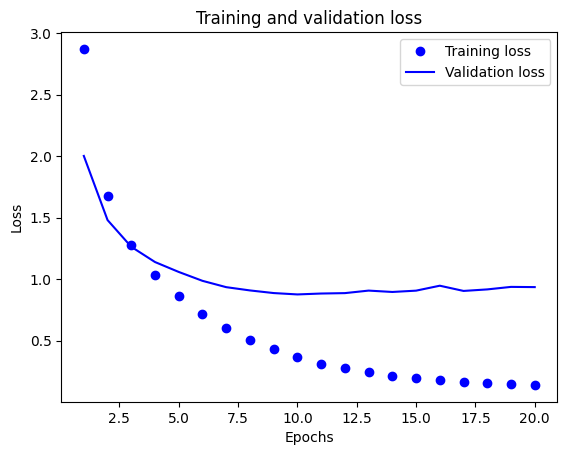

In [123]:
import matplotlib.pyplot as plt
plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

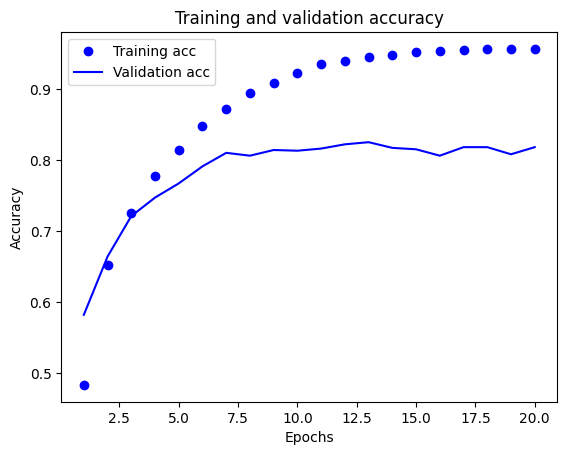

In [126]:
plt.clf()
acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [77]:
model = keras.Sequential([
    layers.Dense(16, activation=activations.relu),
    layers.Dense(16, activation=activations.relu),
    layers.Dense(1, activation=activations.sigmoid)
])

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.mse,
              metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 0s 4ms/step - loss: 0.1681 - binary_accuracy: 0.7879
Epoch 2/4
49/49 [==============================] - 0s 3ms/step - loss: 0.0929 - binary_accuracy: 0.8950
Epoch 3/4
49/49 [==============================] - 0s 3ms/step - loss: 0.0725 - binary_accuracy: 0.9143
Epoch 4/4
782/782 [==============================] - 0s 441us/step - loss: 0.0840 - binary_accuracy: 0.8878


[0.08395315706729889, 0.8878399729728699]

In [79]:
model.predict(x_test)[:30]

782/782 [==============================] - 0s 397us/step


array([[0.19618832],
       [0.99913734],
       [0.6930771 ],
       [0.6926562 ],
       [0.93408626],
       [0.6931646 ],
       [0.9935043 ],
       [0.03447024],
       [0.94769055],
       [0.96592724],
       [0.8447597 ],
       [0.0140048 ],
       [0.00237432],
       [0.03880995],
       [0.99342316],
       [0.00670355],
       [0.91348207],
       [0.6834202 ],
       [0.03092749],
       [0.11396961],
       [0.9871882 ],
       [0.9815751 ],
       [0.37275195],
       [0.88173735],
       [0.8249614 ],
       [0.93770885],
       [0.12085488],
       [0.83013093],
       [0.96857107],
       [0.00932463]], dtype=float32)

In [94]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [95]:
word_index = reuters.get_word_index()

words = dict([(index, word) for (word, index) in word_index.items()])

' '.join([words.get(i - 3, '?') for i in train_data[0]])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [96]:
x_train = encode_onehot(train_data)
x_test = encode_onehot(test_data)

In [151]:
y_train = encode_onehot(np.array([[i] for i in train_labels]), num_words=46)
y_test =  encode_onehot(np.array([[i] for i in test_labels]), num_words=46)

y_train_verify = keras.utils.to_categorical(train_labels)
y_test_verify = keras.utils.to_categorical(test_labels)

np.sum(np.abs(y_train - y_train_verify)) + np.sum(np.abs(y_test - y_test_verify))

0.0

In [177]:
model = keras.Sequential([
    layers.Dense(64, activation=activations.relu),
    layers.Dense(64, activation=activations.relu),
    layers.Dense(46, activation=activations.softmax)
])

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy])

n_val = 1000
x_val = x_train[:n_val]
y_val = y_train[:n_val]
x_train_partial = x_train[n_val:]
y_train_partial = y_train[n_val:]

In [178]:
history = model.fit(x_train_partial, y_train_partial, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 16ms/step - loss: 2.6518 - categorical_accuracy: 0.5115 - val_loss: 1.8348 - val_categorical_accuracy: 0.6090
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 1.5352 - categorical_accuracy: 0.6798 - val_loss: 1.4211 - val_categorical_accuracy: 0.6840
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 1.2052 - categorical_accuracy: 0.7323 - val_loss: 1.2291 - val_categorical_accuracy: 0.7210
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 0.9952 - categorical_accuracy: 0.7726 - val_loss: 1.1271 - val_categorical_accuracy: 0.7500
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.8325 - categorical_accuracy: 0.8106 - val_loss: 1.0377 - val_categorical_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6950 - categorical_accuracy: 0.8467 - val_loss: 0.9817 - val_categorical_accuracy: 0.7870
Epoch 7/20
16/1

In [153]:
model = keras.Sequential([
    layers.Dense(64, activation=activations.relu),
    layers.Dense(64, activation=activations.relu),
    layers.Dense(46, activation=activations.softmax)
])

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy])

model.fit(x_train, y_train, epochs=10, batch_size=512)

model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

Epoch 1/10
18/18 [==============================] - 0s 6ms/step - loss: 3.1825 - categorical_accuracy: 0.2560
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 2.2459 - categorical_accuracy: 0.5261
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 1.8592 - categorical_accuracy: 0.5356
Epoch 4/10
18/18 [==============================] - 0s 6ms/step - loss: 1.6839 - categorical_accuracy: 0.5446
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 1.5781 - categorical_accuracy: 0.5636
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 1.5035 - categorical_accuracy: 0.5783
Epoch 7/10
18/18 [==============================] - 0s 5ms/step - loss: 1.4435 - categorical_accuracy: 0.5853
Epoch 8/10
18/18 [==============================] - 0s 6ms/step - loss: 1.3948 - categorical_accuracy: 0.5911
Epoch 9/10
18/18 [==============================] - 0s 5ms/step - loss: 1.3548 - categorical_accuracy: 0.6092
Epoch 10/1

[1.5331127643585205, 0.5863757729530334]

In [138]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy) # random classifier that respects the emprical distribution of classes in test_labels

#test_labels_copy = np.random.randint(0, 46) # random classifier that assigns equal probability to each class

hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1892252894033838

In [139]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 610us/step


In [140]:
predictions

array([[1.1744573e-05, 1.2900515e-05, 1.7392815e-05, ..., 8.8696161e-06,
        1.2746639e-06, 1.7760482e-07],
       [1.0251825e-03, 7.8803830e-02, 3.6554199e-02, ..., 5.4380198e-06,
        6.7625056e-06, 6.3090345e-05],
       [7.4778721e-03, 8.9178193e-01, 5.9301723e-03, ..., 9.3387999e-04,
        6.9281034e-04, 6.3571730e-04],
       ...,
       [4.8985275e-05, 1.8072265e-04, 6.8066023e-05, ..., 1.1880428e-04,
        5.1423001e-05, 5.3370763e-06],
       [5.1353574e-03, 1.2284884e-02, 6.5997615e-03, ..., 1.1916783e-03,
        5.4935133e-04, 7.7197119e-04],
       [5.8461404e-03, 2.3627183e-01, 2.3553144e-02, ..., 3.4126791e-03,
        7.0487906e-04, 1.2631224e-03]], dtype=float32)

In [141]:
np.sum(predictions, axis=1)

array([0.9999999 , 1.        , 1.0000001 , ..., 1.0000001 , 0.99999994,
       1.        ], dtype=float32)

In [148]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=[metrics.sparse_categorical_accuracy])

model.fit(x_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
18/18 [==============================] - 0s 6ms/step - loss: 0.2821 - sparse_categorical_accuracy: 0.9367
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 0.2421 - sparse_categorical_accuracy: 0.9418
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 0.2123 - sparse_categorical_accuracy: 0.9468
Epoch 4/10
18/18 [==============================] - 0s 5ms/step - loss: 0.1926 - sparse_categorical_accuracy: 0.9479
Epoch 5/10
18/18 [==============================] - 0s 6ms/step - loss: 0.1838 - sparse_categorical_accuracy: 0.9503
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 0.1643 - sparse_categorical_accuracy: 0.9517
Epoch 7/10
18/18 [==============================] - 0s 6ms/step - loss: 0.1558 - sparse_categorical_accuracy: 0.9545
Epoch 8/10
18/18 [==============================] - 0s 5ms/step - loss: 0.1460 - sparse_categorical_accuracy: 0.9541
Epoch 9/10
18/18 [==============================] - 0s 5ms/step 

In [246]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [247]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

x_train = (train_data - mean) / std
x_test = (test_data - mean) / std

y_train = train_targets
y_test = test_targets

y_train.shape

(404,)

In [248]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=activations.relu),
        layers.Dense(64, activation=activations.relu),
        layers.Dense(1)
    ])
    model.compile(optimizer=optimizers.RMSprop(),
                  loss=losses.mse,
                  metrics=[metrics.mae])
    return model

In [249]:
k = 4

num_val_samples = len(train_data) // k

num_epochs = 500

all_mae_histories = []

for i in range(k):
    print(f'Processing fold #{i}')
    x_val = x_train[i * num_val_samples:(i + 1) * num_val_samples]
    y_val = y_train[i * num_val_samples:(i + 1) * num_val_samples]
    x_train_partial = np.concatenate((x_train[:i * num_val_samples], x_train[(i + 1) * num_val_samples:]), axis=0)
    y_train_partial = np.concatenate((y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]), axis=0)

    model = build_model()

    history = model.fit(x_train_partial, y_train_partial, epochs=num_epochs, batch_size=16, validation_data=(x_val, y_val), verbose=0)

    mae_history = history.history['val_mean_absolute_error']

    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [250]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

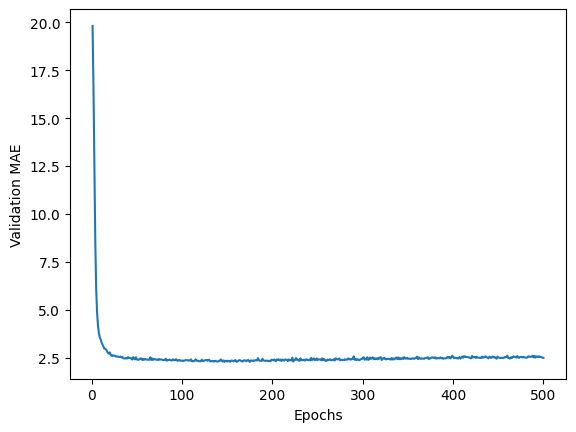

In [253]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

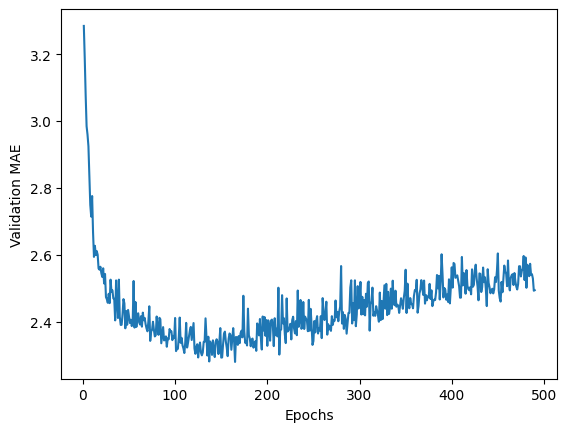

In [254]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [255]:
model = build_model()

model.fit(x_train, y_train, epochs=130, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
test_mse_score, test_mae_score

4/4 [==============================] - 0s 811us/step - loss: 13.4990 - mean_absolute_error: 2.3966


(13.49897575378418, 2.3966064453125)